In [1]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt

In [2]:
# sampling rate
fs = 10000000 # 10MHz

# signal length
t = np.arange(0, 0.5, 1 / fs) # s, sampling interval, time array

# generate signal
f1 = 60 # 60Hz
signal_f = 2*np.sin(2*np.pi*f1*t)  # amplitude = 2

# generate noise signal
np.random.seed(222)
n1 = np.random.uniform(1000000, 1500000, len(t)) # 1MHz ~ 1.5 MHz
signal_n = 0.2*np.sin(2*np.pi*n1*t)

# total signal
normal_signal = signal_f + signal_n

#  generate noise Arc signal

n3 = 4000000 # 4MHz

np.random.seed(333)
random_mag_Arc = np.random.uniform(0.8, 1.1, 1500)
signal_Arc = random_mag_Arc*np.sin(2*np.pi*n3*t[82500:84000])

signal_Arc # 아크 신호

temp = list(normal_signal) # shoulder 범위만 아크 신호를 더해주기 위해 타입변환

# shoulder 범위만 아크 신호 더하고 shoulder 범위가 아닌 부분은 아크신호를 더하지 않음.

import random
num_s =[] # shoulder 부분 Counting 역할

i,j = 1, 0
s0 = temp[82500*0+1500*0:82500*1+1500*0]
end = (82500*1)+(1500*0)

while (len(s0) != 5000000):
    start = end
    np.random.seed(0)
    num = random.randint(0,2) # 아크 신호를 랜덤하기 더해주기 위한 규칙 생성
    num_s.append(num)
    
    if i == j: # shoulder 범위가 아닐때 그냥 신호 더해줌.
        i += 1
        end = (82500*i)+(1500*j)
        s0 = s0+temp[start:end]
    elif i!=j and num == 2: # shoulder 범위 이면서 num == 2일 경우 아크 신호 더함.
        j += 1
        end = (82500*i)+(1500*j)
        x = temp[start:end] + signal_Arc
        s0 = s0+ list(x) 
    else: # shoulder 범위 이나 num은 2가 아닐 경우 노말 신호만 더해줌.
        j += 1
        end = (82500*i)+(1500*j)
        s0 = s0+ temp[start:end] 
        
sig = np.array(s0) # numpy array type으로 변환

In [3]:
len(sig)

5000000

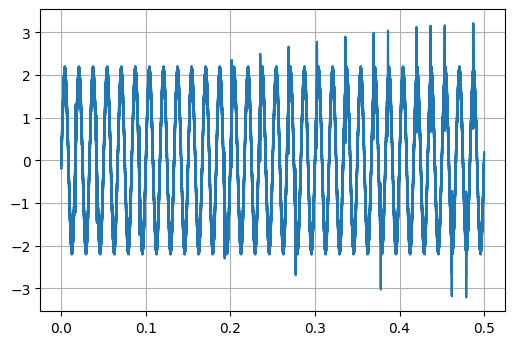

In [69]:
# visualizing signal (노말과 아크 상태를 추가하여 완성된 신호)

plt.figure(num = 1, dpi = 100)
plt.plot(t, sig)
plt.grid()

In [5]:
# test signal 1
test1 = sig[:1000000]

# test signal 2
test2 = sig[1000000:2000000]

# test signal 3
test3 = sig[2000000:3000000]

# test signal 4
test4 = sig[3000000:4000000]

# test signal 5
test5 = sig[4000000:5000000]

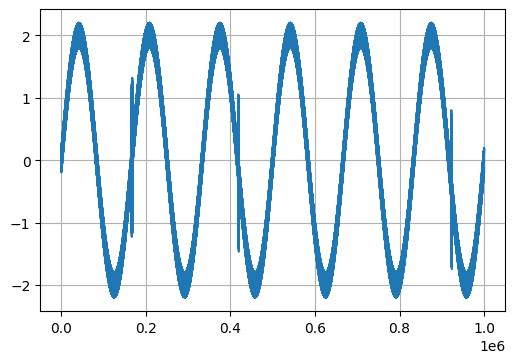

In [6]:
plt.figure(num = 1, dpi = 100)
plt.plot(test1)
plt.grid()

In [7]:
wp = pywt.WaveletPacket(data = test1, wavelet = 'db10', mode = 'symmetric')

In [8]:
wp.maxlevel

15

In [9]:
print(wp['ddd'].data)
print(wp['ddd'].path)

[ 4.00668232e-02 -5.83241647e-02  2.33766674e-02 ... -2.46893362e-04
  2.67011176e-01 -5.83668850e-02]
ddd


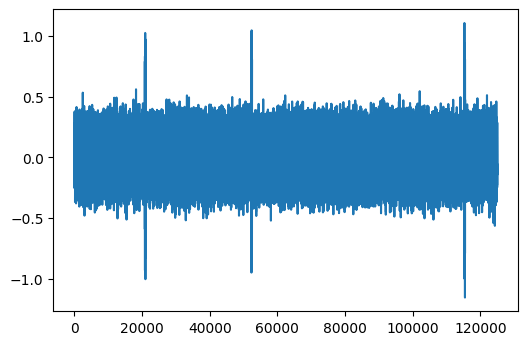

In [10]:
plt.figure(num = 1, dpi = 100)
plt.plot(wp['ddd'].data)

In [11]:
xx = wp['ddd'].data
len(xx)

125016

In [43]:
shift_size = 4500
window_length = 9000
ratio = []

for i in np.arange(0, len(xx), 4500):
    window_1 = xx[i:i + window_length]
    window_2 = xx[i + shift_size: i + shift_size + window_length]

    I_max = window_1.max()

    I_n_max = window_2.max()


    I_ratio = I_n_max / I_max

    ratio.append(I_ratio)

ValueError: zero-size array to reduction operation maximum which has no identity

In [75]:
ratio

[0.9248341025157498,
 1.0,
 2.0783958934025493,
 1.0,
 0.46617730470617336,
 1.0685703910941595,
 1.0,
 0.8535210810616214,
 1.141329936180765,
 2.103863638397212,
 1.0,
 0.48825726913139,
 1.0,
 0.9024411984053582,
 0.989760895299392,
 0.9971429421233236,
 1.030827483956537,
 1.0,
 1.0427927758462563,
 1.0628379809732411,
 1.0487913288660151,
 1.0,
 0.870628298949121,
 2.3317855098238214,
 1.0,
 0.46293016349801647,
 1.0]

In [81]:
tt = np.linspace(0, 0.1, len(ratio))

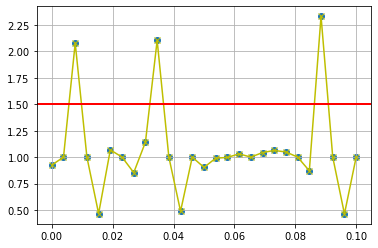

In [84]:
plt.scatter(tt, ratio)
plt.plot(tt, ratio, 'yx-')
plt.axhline(y = 1.5, color = 'r', linewidth = 2)
plt.grid()

# -------------------------------

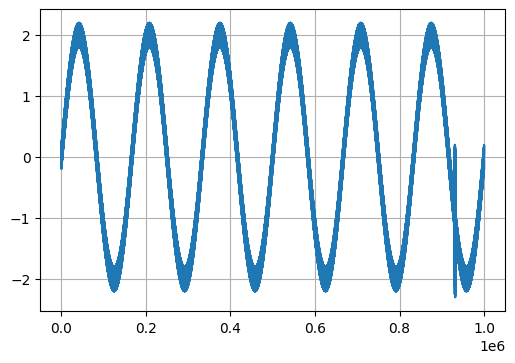

In [16]:
plt.figure(num = 1, dpi = 100)
plt.plot(test2)
plt.grid()

In [17]:
wp = pywt.WaveletPacket(data = test2, wavelet = 'db10', mode = 'symmetric')

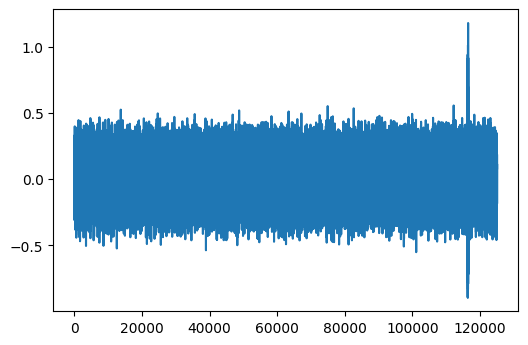

In [18]:
plt.figure(num = 1, dpi = 100)
plt.plot(wp['ddd'].data)

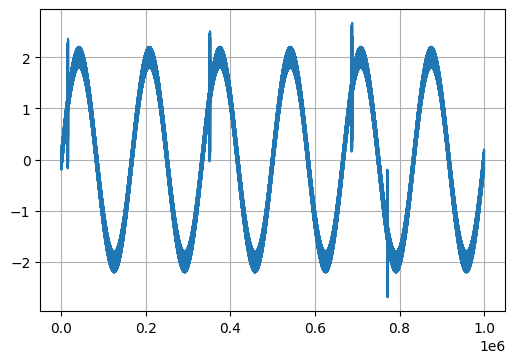

In [19]:
plt.figure(num = 1, dpi = 100)
plt.plot(test3)
plt.grid()

In [20]:
wp = pywt.WaveletPacket(data = test3, wavelet = 'db10', mode = 'symmetric')

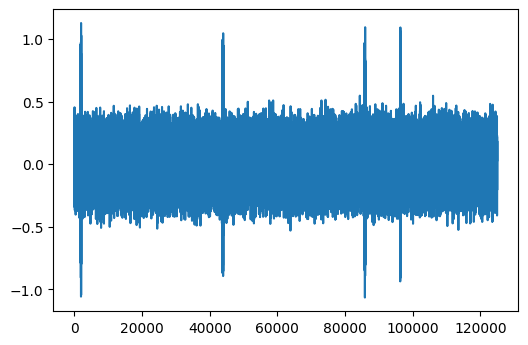

In [21]:
plt.figure(num = 1, dpi = 100)
plt.plot(wp['ddd'].data)

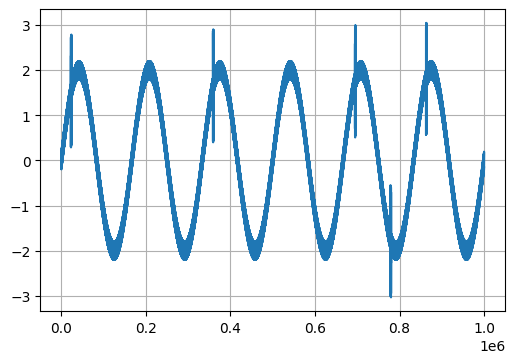

In [22]:
plt.figure(num = 1, dpi = 100)
plt.plot(test4)
plt.grid()

In [23]:
wp = pywt.WaveletPacket(data = test4, wavelet = 'db10', mode = 'symmetric')

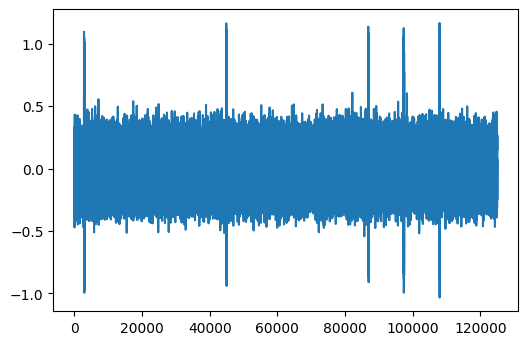

In [24]:
plt.figure(num = 1, dpi = 100)
plt.plot(wp['ddd'].data)

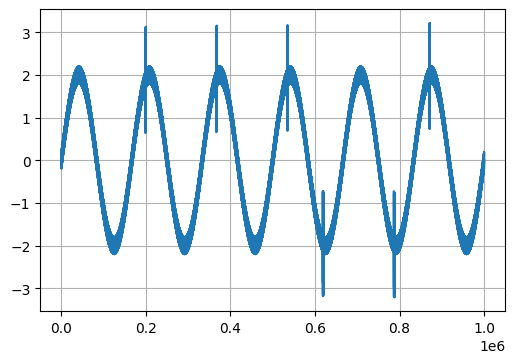

In [25]:
plt.figure(num = 1, dpi = 100)
plt.plot(test5)
plt.grid()

In [26]:
wp = pywt.WaveletPacket(data = test5, wavelet = 'db10', mode = 'symmetric')

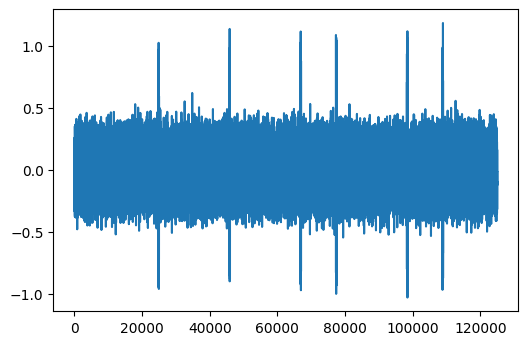

In [27]:
plt.figure(num = 1, dpi = 100)
plt.plot(wp['ddd'].data)

In [28]:
print(len(wp['dd'].data))
print(len(wp['da'].data))
print(len(wp['aa'].data))
print(len(wp['ad'].data))

250014
250014
250014
250014
